<a href="https://colab.research.google.com/github/Rafikul10/Dog-s-Eemotion-Predict-CNN/blob/main/Dog's_Eemotion_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Identifying the Dog's Emotion Using **Deep Learning** and **Keras**

TODO -

We are going to do in following steps -
1. Pick a dataset
2. Download the dataset using `opendataset`
3. Import the dataset using `pandas`
4. Explore the dataset
5. Prepare the dataset for training
6. Move the dataset to GPU
7. Define a Neural Network
8. Train the model
9. Make prediction on sample images, itrate on it with different images and HyperParameters

###Download the Dataset
Using `opendatasets` downloading dataset from https://www.kaggle.com/datasets/devzohaib/dog-emotions-prediction

In [7]:
#!pip uninstall tensorflowy

In [8]:
#!pip install tensorflow===2.3.0

In [9]:
!pip install opendatasets --upgrade --quiet

In [10]:
import opendatasets as od                                                          # opendataset is a Python library
data_url = 'https://www.kaggle.com/datasets/devzohaib/dog-emotions-prediction'     # Define URL of the dataset
od.download(data_url)                                                              # Download datset from kaggle

100%|██████████| 379M/379M [00:02<00:00, 146MB/s]


In [11]:
import os                                                  # Import os library
data_dir = '/content/dog-emotions-prediction/images'       # difine dataset directory
os.listdir(data_dir)                                       # list of all files

['happy', 'relaxed', 'sad', 'angry']

In [12]:
for cls in os.listdir(data_dir):           # Check the numebr of iamge available per class
  print(cls,len(os.listdir(data_dir + '/' + cls)))

happy 4784
relaxed 4349
sad 4532
angry 2256


In [13]:
# Obseervation - In angry class have less number of pictures
              #  we can add more angry pictures by using the dataset IamgeDataGenerator

In [14]:
from glob import glob    # Import glob function
data_dirc = '/content/dog-emotions-prediction/images/*'    # Define directory of dataset
data = glob(data_dirc)
data

['/content/dog-emotions-prediction/images/happy',
 '/content/dog-emotions-prediction/images/relaxed',
 '/content/dog-emotions-prediction/images/sad',
 '/content/dog-emotions-prediction/images/angry']

In [15]:
dataset_dir = '/content/dog-emotions-prediction/images/*/*' 
dataset = glob(dataset_dir)
len(dataset)

15921

### Visulaization of Images using `matplotlib`
Matplotlib - is an amazing visualization library in `Python` for 2D plots of arrays, It is a multi-platform data visualization library built on NumPy arrays and designed to work with the broader SciPy stack.

Text(0.5, 1.0, 'Happy dog')

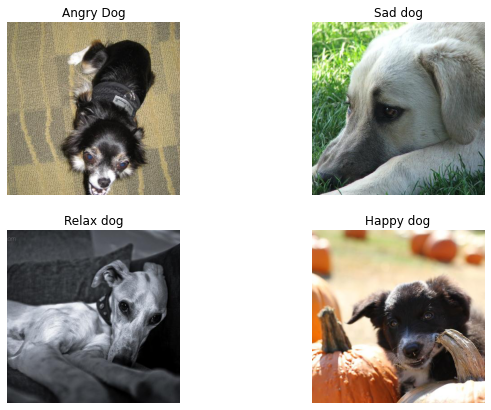

In [16]:
# Import matplotlib library
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing import image

# Create figure
fig = plt.figure(figsize=(10, 7))
  
# Setting values to rows and column variables
rows = 2
columns = 2

# Define one random image directory from angry class
angry_img_url = '/content/dog-emotions-prediction/images/angry/1023755863_7a7b74d175_b.jpg'
img1 = image.load_img(angry_img_url)

# Define one random image directory from sad class
sad_img_url = '/content/dog-emotions-prediction/images/sad/10107489634_e3cb096477_b.jpg'  
img2 = image.load_img(sad_img_url)

# Define one random image directory from relax class
relax_img_url = '/content/dog-emotions-prediction/images/relaxed/10607104983_6a0b785057_b.jpg'
img3 = image.load_img(relax_img_url)

# Define one random image directory from happy class
happy_img_url = '/content/dog-emotions-prediction/images/happy/10460837816_e14a19f604_b.jpg'
img4 = image.load_img(happy_img_url)

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# Showing first image(angry dog)
plt.imshow(img1)
plt.axis('off')
plt.title('Angry Dog')

# Add a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# Showing second image (sad dog)
plt.imshow(img2)
plt.axis('off')
plt.title('Sad dog')

# Add a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)

# Showing third image (relax dog)
plt.imshow(img3)
plt.axis('off')
plt.title('Relax dog')

# Add a subplot at the 4th position 
fig.add_subplot(rows, columns, 4)

# Showing fourth image (happy dog)
plt.imshow(img4)
plt.axis('off')
plt.title('Happy dog')

###Model - Convolutional Neural Network
In deep learning, a convolutional neural network(CNN) is a class of artificial neural network, most commonly applied to analyze visual imagery. 

### Network parameter :


*  Rectifier Linear Unit
*  Adam Optimizer
*  Sigmoid on Final output
*  Binary CrossEntropy loss



In [17]:
# Import layers for model
import tensorflow
from tensorflow.keras.models import Sequential           
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

import warnings
warnings.filterwarnings('ignore')


# Build Model
classifier = Sequential()
classifier.add(Conv2D(filters=32,kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))    # Add one conv2d player first
classifier.add(MaxPooling2D(pool_size=(2,2)))                                 # Add maxpooling2d layer
classifier.add(Conv2D(filters=64,kernel_size=(3,3), activation='relu'))                           # Add conv2d layer
classifier.add(MaxPooling2D(pool_size=(2,2)))                                 # Add maxpooling2d layer
classifier.add(Flatten())                                                     # Flatten the model
classifier.add(Dense(500, activation='relu'))                           # Add dense layer
classifier.add(Dense(4, activation='softmax'))                          # Add one more dense layer and change the activation function
classifier.summary()

# Compile the model
adam = tensorflow.keras.optimizers.Adam(lr=0.001,beta_1=0.9,beta_2=0.999,epsilon=None,decay=0.0,amsgrad=False)
classifier.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])  #loss binary_crossentropy and optimizer adam                                                                      

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 500)               9

### Data Agumentation
using some Data Agumentation techniques for more data and Better results


*   Shearing of images
*   Random zoom
*   Horizontal flips
*   Validation split



In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator   # import of IamgeDataGenerator

IMAGE_SIZE = (224,224)                                   # define image hight and width
BATCH_SIZE = 32                                            # store batch_size in a variable

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)                         # Set validation split

# Trainig set
train_generator = train_datagen.flow_from_directory(data_dir,                    # set data directory
                                                    target_size=(224,224),      # image_size is (224,224)
                                                    batch_size=32,       # batch_size is 32
                                                    class_mode='categorical',    
                                                    subset='training'            # set as training data
                                                    )

# validation set/ outputs available
validation_generator = train_datagen.flow_from_directory(data_dir,               # same direcory as trainig data
                                                         target_size=(224,224), # image_size is (224,224)
                                                         batch_size=32,  # batch_size is 32
                                                         class_mode='categorical',
                                                         subset='validation')    # set as validation data


Found 12739 images belonging to 4 classes.
Found 3182 images belonging to 4 classes.


In [19]:
type(train_generator)

keras.preprocessing.image.DirectoryIterator

In [20]:
%%capture
model = classifier.fit(
    train_generator,
    steps_per_epoch = 10,
    epochs = 5,
    validation_data = validation_generator,
    validation_steps =5
)

In [21]:
import pandas as pd
validation_generator.reset
ytesthat = classifier.predict_generator(validation_generator)
df = pd.DataFrame({
    'filename':validation_generator.filenames,
    'predict':ytesthat[:,0],
    'y':validation_generator.classes
})

In [22]:
# pd.set_option('display.float_format',lambda x: '%.5f' % x)
# df['y_pred'] = df['predict']>0.5
# df.y_pred = df.y_pred.astype(int)
# df.tail(10)

In [24]:
# misclassified = df[df['y']!=df['y_pred']]
# print('Total misclassified image from 3182 validation images : %d' %misclassified['y'].count())

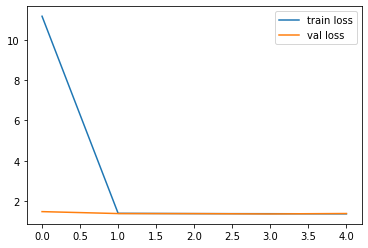

In [25]:
# plot the loss
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(model.history['loss'], label='train loss')
plt.plot(model.history['val_loss'], label='val loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

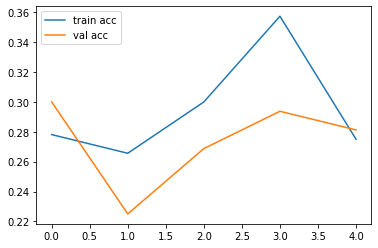

In [27]:
# plot the accuracy
plt.plot(model.history['accuracy'], label='train acc')
plt.plot(model.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')